## 1. 라이브러리

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("tf ver= ",tf.__version__)

tf ver=  2.4.0


## 2. 데이터 탐색 및 전처리 

In [2]:
raw_data = pd.read_csv(r"C:\Users\USER\kdigitalc\rawdata\woo\dacon\funda_train.csv")

In [3]:
raw_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


### Data
- store_id : 상점의 고유 아이디
- card_id : 사용한 카드의 고유 아이디
- card_company : 비식별화된 카드 회사
- trasacted_date : 거래 날짜
- transacted_time : 거래 시간( 시:분 )
- installment_term : 할부 개월 수( 포인트 사용 시 (60개월 + 실제할부개월)을 할부개월수에 기재한다. )
- region : 상점의 지역
- type_of_business : 상점의 업종
- amount : 거래액(단위는 원이 아닙니다)

In [4]:
raw_data.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [5]:
raw_data.count()

store_id            6556613
card_id             6556613
card_company        6556613
transacted_date     6556613
transacted_time     6556613
installment_term    6556613
region              4513847
type_of_business    2604004
amount              6556613
dtype: int64

In [6]:
raw_data.shape

(6556613, 9)

In [7]:
raw_data["type_of_business"].unique()

array(['기타 미용업', nan, '의복 액세서리 및 모조 장신구 도매업', '한식 음식점업',
       '배관 및 냉ㆍ난방장치 도매업', '그 외 기타 스포츠시설 운영업', '간이음식 포장 판매 전문점',
       '안경 및 렌즈 소매업', '그 외 기타 분류 안된 상품 전문 소매업', '채소, 과실 및 뿌리작물 소매업',
       '서양식 음식점업', '통신기기 소매업', '기타 주점업', '의복 소매업', '두발 미용업',
       '섬유, 직물 및 의복액세서리 소매업', '외국어학원', '기타 외국식 음식점업', '가정용 세탁업',
       '낚시장 운영업', '육류 소매업', '전자상거래 소매업', '일식 음식점업', '화장품, 비누 및 방향제 소매업',
       '가전제품 소매업', '기타 스포츠 교육기관', '체형 등 기타 신체관리 서비스업', '여행사업',
       '기타 교육지원 서비스업', '기타 교습학원', '곡물 및 기타 식량작물 재배업', '기록매체 복제업',
       '골프연습장 운영업', '속옷 및 잠옷 소매업', '그 외 기타 분류 안된 사업지원 서비스업', '담배 소매업',
       '기타 예술학원', '문구용품 및 회화용품 소매업', '기타 음ㆍ식료품 위주 종합 소매업',
       '운동 및 경기용품 소매업', '그 외 기타 상품 전문 도매업', '그 외 기타 창작 및 예술관련 서비스업',
       '자전거 및 기타 운송장비 소매업', '가구 소매업', '애완용 동물 및 관련용품 소매업',
       '철물, 금속 파스너 및 수공구 도매업', '피부 미용업', '기타 자동차 신품 부품 및 내장품 판매업',
       '비알코올 음료점업', '화장품 및 화장용품 도매업', '애완동물 장묘 및 보호 서비스업',
       '그 외 기타 무점포 소매업', '운동 및 경기용품 도매업', '치킨 전문점', '자동차 전문 수리업',
       '일반 교과 학원', '그 외 기타 생활용품 

In [8]:
raw_data["card_id"].unique() 

array([      0,       1,       2, ..., 4663854, 4663855, 4663856],
      dtype=int64)

In [21]:
len(raw_data["card_id"].unique())  #중간에 왜 카드아이디가 빈 것이 있지???...

3950001

In [79]:
uni = list(raw_data["card_id"].unique())

In [80]:
len(uni)

3950001

In [81]:
cnt = list(range(0,4663857))

In [82]:
len(cnt)

4663857

In [83]:
difference = set(cnt) - set(uni)

In [84]:
len(difference)

713856

In [85]:
difference

{1917322,
 1917323,
 1917324,
 1917325,
 1917326,
 1917327,
 1917328,
 1917329,
 4194495,
 4194496,
 4194497,
 4194498,
 4194499,
 4194500,
 4194501,
 4194502,
 4194503,
 4194504,
 4194505,
 4194506,
 4194507,
 4194508,
 4194509,
 4194510,
 4194511,
 4194512,
 4194513,
 4194514,
 4194515,
 4194516,
 4194517,
 4194518,
 4194519,
 4194520,
 4194521,
 4194522,
 4194523,
 4194524,
 4194525,
 4194526,
 4194527,
 4194528,
 4194529,
 4194530,
 4194531,
 4194532,
 4194533,
 4194534,
 4194535,
 4194536,
 4194537,
 4194538,
 4194539,
 4194540,
 4194541,
 4194542,
 4194543,
 4194544,
 4194545,
 4194546,
 4194547,
 4194548,
 4194549,
 4194550,
 4194551,
 4194552,
 4194553,
 4194554,
 4194555,
 4194556,
 4194557,
 4194558,
 4194559,
 4194560,
 4194561,
 4194562,
 4194563,
 4194564,
 4194565,
 4194566,
 4194567,
 4194568,
 4194569,
 4194570,
 4194571,
 4194572,
 4194573,
 4194574,
 4194575,
 4194576,
 4194577,
 4194578,
 4194579,
 4194580,
 4194581,
 4194582,
 4194583,
 4194584,
 4194585,
 4194586,


In [105]:
raw_data[(raw_data["card_id"]>=1800) & (raw_data["card_id"]<=1940)]
### 결과를 보니 funda에서 데이터를 줄 때, 먼저 전처리를 해서 줘서 중간에 card_id가 빈다고 생각이 든다

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
4469,0,1800,b,2019-02-25,20:52,0,NaN,기타 미용업,2142.857143
4470,0,1801,a,2019-02-27,11:44,0,NaN,기타 미용업,1714.285714
4475,0,1802,g,2019-02-28,10:54,0,NaN,기타 미용업,2000.000000
4481,1,1931,b,2016-06-01,13:31,0,NaN,NaN,1071.428571
4482,1,1932,h,2016-06-01,14:18,0,NaN,NaN,428.571429
...,...,...,...,...,...,...,...,...,...
8143,1,1936,c,2019-01-28,18:07,0,NaN,NaN,500.000000
8224,1,1936,c,2019-02-19,17:39,0,NaN,NaN,500.000000
1368672,499,1939,f,2017-07-21,21:55,0,NaN,NaN,2571.428571
1481260,536,1856,b,2019-02-18,13:30,0,서울 광진구,기타 미용업,2142.857143


In [9]:
raw_data["region"].unique()

array([nan, '서울 종로구', '충북 충주시', '부산 동래구', '경기 평택시', '부산 동구', '광주 동구',
       '경기 파주시', '대구 수성구', '경기 용인시', '서울 중구', '경기 안양시', '경기 수원시',
       '경기 화성시', '서울 송파구', '서울 마포구', '부산 부산진구', '서울 용산구', '충남 금산군',
       '서울 중랑구', '전남 목포시', '경기 안성시', '서울 영등포구', '서울 동작구', '경기 과천시',
       '경북 경주시', '인천 계양구', '서울 강서구', '경기 성남시', '인천 남동구', '서울 광진구',
       '서울 서대문구', '서울 은평구', '서울 강남구', '강원 강릉시', '서울 구로구', '서울 서초구',
       '경기 시흥시', '인천 서구', '서울 양천구', '경기 부천시', '경기 광주시', '서울 금천구',
       '서울 관악구', '인천 남구', '인천 동구', '충북 제천시', '광주 광산구', '인천 연수구', '인천 부평구',
       '경기 의왕시', '전남 순천시', '경기 이천시', '경기 의정부시', '경기 포천시', '경기 양주시',
       '경기 고양시', '충북 옥천군', '경기 광명시', '경기 구리시', '경기 남양주시', '경기 가평군',
       '전남 여수시', '경기 안산시', '경기 오산시', '경기 김포시', '서울 성동구', '전북 군산시',
       '경남 김해시', '경기 군포시', '제주 서귀포시', '서울 강북구', '제주 제주시', '부산 금정구',
       '경북 구미시', '광주 서구', '부산 사상구', '충남 천안시', '강원 원주시', '충남 아산시',
       '경북 포항시', '부산 강서구', '강원 횡성군', '대구 남구', '경남 양산시', '경남 창원시',
       '강원 양구군', '경남 통영시', '충남 당진시', '부산 사하구', '강

In [10]:
raw_data["region"].value_counts()

경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
           ...  
경남 거창군      1143
서울 관악구      1037
경남 함안군       878
경북 영천시       849
전남 완도군       681
Name: region, Length: 180, dtype: int64

In [11]:
raw_data["region"].value_counts().count()

180

In [20]:
len(raw_data["region"].unique())

181

In [24]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


### 탐색 끝 전처리 시작

In [4]:
temp_data = raw_data.copy()

In [5]:
temp_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


### 머신러닝을 이용한 시계열 예측 (RNN_LSTM)

In [126]:
data = temp_data[["store_id","transacted_date","amount"]] # 가장 단순하게 시계열 예측을 하기위해서 컬럼 3개만 가지고 진행

In [127]:
data.head()

,store_id,transacted_date,amount
0,0,2016-06-01,1857.142857
1,0,2016-06-01,857.142857
2,0,2016-06-01,2000.000000
3,0,2016-06-01,7857.142857
4,0,2016-06-02,2000.000000


In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['store_id','amount']
data_scaled = scaler.fit_transform(data[scale_cols])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = scale_cols

data_scaled

,store_id,amount
0,0.0,0.332414
1,0.0,0.332295
2,0.0,0.332432
3,0.0,0.333134
4,0.0,0.332432
...,...,...
6556608,1.0,0.331652
6556609,1.0,0.332688
6556610,1.0,0.332731
6556611,1.0,0.332260


In [130]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = data_scaled[:-TEST_SIZE]
test = data_scaled[-TEST_SIZE:]

In [131]:
def make_dataset(dt,label,window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(dt)-window_size):
        feature_list.append(np.array(dt.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list),np.array(label_list)

In [133]:
from sklearn.model_selection import train_test_split

feature_cols = ['store_id']
label_cols = ['amount']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature,train_label,20)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature,train_label,test_size=0.2)
x_train.shape, x_valid.shape

((5245114, 20, 1), (1311279, 20, 1))

In [134]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 1), (200, 1))

In [135]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 1), (180, 1))

In [138]:
from tensorflow import keras

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [142]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=20, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/20
327820/327820 [==============================] - 2397s 7ms/step - loss: 1.5231e-05 - val_loss: 1.4223e-05

Epoch 00001: val_loss improved from inf to 0.00001, saving model to model\tmp_checkpoint.h5
Epoch 2/20
327820/327820 [==============================] - 2249s 7ms/step - loss: 1.4143e-05 - val_loss: 1.4172e-05

Epoch 00002: val_loss improved from 0.00001 to 0.00001, saving model to model\tmp_checkpoint.h5
Epoch 3/20
327820/327820 [==============================] - 2250s 7ms/step - loss: 1.4180e-05 - val_loss: 1.4673e-05

Epoch 00003: val_loss did not improve from 0.00001
Epoch 4/20
327820/327820 [==============================] - 2252s 7ms/step - loss: 1.4110e-05 - val_loss: 1.4215e-05

Epoch 00004: val_loss did not improve from 0.00001
Epoch 5/20
327820/327820 [==============================] - 2256s 7ms/step - loss: 1.4355e-05 - val_loss: 1.4489e-05

Epoch 00005: val_loss did not improve from 0.00001
Epoch 6/20
327820/327820 [==============================] - 2253s 7ms

In [143]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(180, 1)

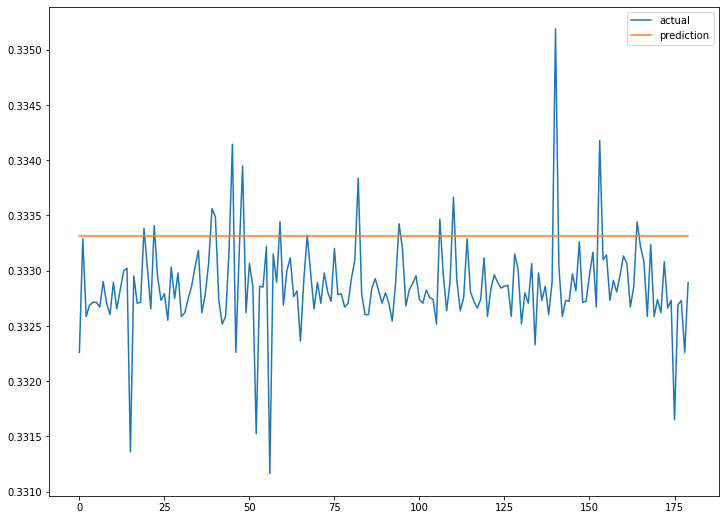

In [145]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

### 하나씩 해보자

In [6]:
data = temp_data[["store_id","transacted_date","amount"]] # 가장 단순하게 시계열 예측을 하기위해서 컬럼 3개만 가지고 진행

In [7]:
data.head()

,store_id,transacted_date,amount
0,0,2016-06-01,1857.142857
1,0,2016-06-01,857.142857
2,0,2016-06-01,2000.000000
3,0,2016-06-01,7857.142857
4,0,2016-06-02,2000.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['store_id','amount']
data_scaled = scaler.fit_transform(data[scale_cols])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = scale_cols

data_scaled

In [ ]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = data_scaled[:-TEST_SIZE]
test = data_scaled[-TEST_SIZE:]

In [ ]:
def make_dataset(dt,label,window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(dt)-window_size):
        feature_list.append(np.array(dt.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list),np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['store_id']
label_cols = ['amount']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature,train_label,20)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature,train_label,test_size=0.2)
x_train.shape, x_valid.shape

### 통계기법을 사용한 시계열 예측 (ARIMA)

In [44]:
temp_data = raw_data[["store_id","transacted_date","amount"]] # 가장 단순하게 시계열 예측을 하기위해서 컬럼 3개만 가지고 진행

In [76]:
temp_data

,store_id,amount
transacted_date,,
2016-06-01,0,1857.142857
2016-06-01,0,857.142857
2016-06-01,0,2000.000000
2016-06-01,0,7857.142857
2016-06-02,0,2000.000000
...,...,...
2019-02-28,2136,-4500.000000
2019-02-28,2136,4142.857143
2019-02-28,2136,4500.000000


In [45]:
temp_data.head()

,store_id,transacted_date,amount
0,0,2016-06-01,1857.142857
1,0,2016-06-01,857.142857
2,0,2016-06-01,2000.000000
3,0,2016-06-01,7857.142857
4,0,2016-06-02,2000.000000


In [46]:
type(temp_data["transacted_date"][0])

str

In [47]:
temp_data['transacted_date'] = pd.to_datetime(temp_data['transacted_date'])

C:\Anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
temp_data.set_index('transacted_date',inplace=True)

In [75]:
temp_data

,store_id,amount
transacted_date,,
2016-06-01,0,1857.142857
2016-06-01,0,857.142857
2016-06-01,0,2000.000000
2016-06-01,0,7857.142857
2016-06-02,0,2000.000000
...,...,...
2019-02-28,2136,-4500.000000
2019-02-28,2136,4142.857143
2019-02-28,2136,4500.000000


In [49]:
temp_data.head()

,store_id,amount
transacted_date,,
2016-06-01,0,1857.142857
2016-06-01,0,857.142857
2016-06-01,0,2000.000000
2016-06-01,0,7857.142857
2016-06-02,0,2000.000000


In [50]:
store_id_list = list(temp_data["store_id"].unique())

In [51]:
store_id_list

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 198

In [52]:
store_one = temp_data[temp_data["store_id"]==0]

In [53]:
store_one

,store_id,amount
transacted_date,,
2016-06-01,0,1857.142857
2016-06-01,0,857.142857
2016-06-01,0,2000.000000
2016-06-01,0,7857.142857
2016-06-02,0,2000.000000
...,...,...
2019-02-28,0,2857.142857
2019-02-28,0,6428.571429
2019-02-28,0,7142.857143


In [54]:
store_one = store_one[['amount']]

In [55]:
store_one

,amount
transacted_date,
2016-06-01,1857.142857
2016-06-01,857.142857
2016-06-01,2000.000000
2016-06-01,7857.142857
2016-06-02,2000.000000
...,...
2019-02-28,2857.142857
2019-02-28,6428.571429
2019-02-28,7142.857143


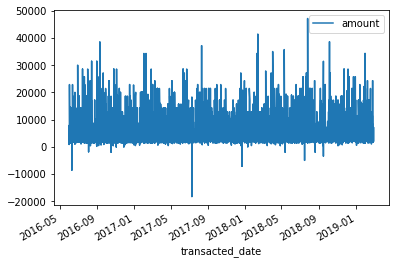

In [56]:
store_one.plot()
plt.show()

#### 환불내역이 존재함을 확인

In [57]:
store_one[store_one["amount"]<0]

,amount
transacted_date,
2016-06-10,-8571.428571
2016-08-04,-1857.142857
2016-10-17,-2000.000000
2016-11-03,-85.714286
2016-11-28,-57.142857
2017-07-10,-18285.714286
2017-12-22,-7142.857143
2018-01-10,-18.571429
2018-05-13,-2000.000000


In [58]:
store_one['year'] = store_one.index.year

In [59]:
store_one['month'] = store_one.index.month

In [60]:
store_one

,amount,year,month
transacted_date,,,
2016-06-01,1857.142857,2016,6
2016-06-01,857.142857,2016,6
2016-06-01,2000.000000,2016,6
2016-06-01,7857.142857,2016,6
2016-06-02,2000.000000,2016,6
...,...,...,...
2019-02-28,2857.142857,2019,2
2019-02-28,6428.571429,2019,2
2019-02-28,7142.857143,2019,2


In [61]:
store_one_train_group = store_one[store_one.index<='2018-09-30']

In [62]:
store_one_train_group=store_one_train_group.groupby(['year','month']).sum()

In [63]:
store_one_test_group=store_one[store_one.index>'2018-09-30']

In [64]:
store_one_test_group = store_one_test_group.groupby(['year','month']).sum()

<AxesSubplot:xlabel='year,month'>

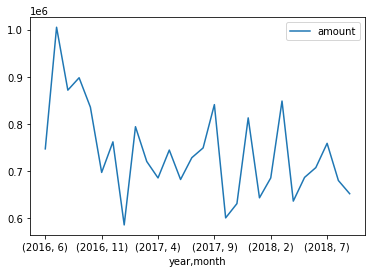

In [65]:
store_one_train_group.plot()

In [86]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(store_one_train_group.amount.values,order=(2,2,2))
model_fit = model.fit(trend='c',full_output=True,disp=True)
print(model_fit.summary())

C:\Anaconda3\envs\study\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -336.667
Method:                       css-mle   S.D. of innovations          81219.991
Date:                Fri, 29 Jan 2021   AIC                            685.335
Time:                        15:17:10   BIC                            692.883
Sample:                             2   HQIC                           687.508
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        980.0827    456.191      2.148      0.032      85.964    1874.201
ar.L1.D2.y    -0.1818      0.270     -0.674      0.500      -0.710       0.347
ar.L2.D2.y    -0.0661      0.253     -0.261      0.7

C:\Anaconda3\envs\study\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\envs\study\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_D

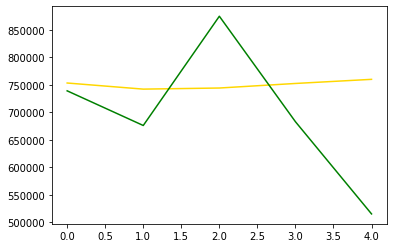

In [87]:
forecast_data = model_fit.forecast(steps=5)

pred_y = forecast_data[0].tolist()
test_y = store_one_test_group.amount.values

pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [68]:
store_one_test_group

amount
year month               
2018 10     739000.000000
     11     676000.000000
     12     874571.428571
2019 1      682857.142857
     2      515285.714286